In [1]:
from google.colab import files
uploaded = files.upload()

Saving Tsunami_dataset.csv to Tsunami_dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('Tsunami_dataset.csv')



In [3]:
df.head()

,latitude,longitude,Year,Month,cdi,mmi,sig,magnitude,nst,dmin,gap,depth,volcanic eruption,tsunami
0,-9.7963,159.596,2022,11,8,7,768,7.0,117,0.509,17.0,14.000,No,1
1,-4.9559,100.738,2022,11,4,4,735,6.9,99,2.229,34.0,25.000,No,0
2,-20.0508,-178.346,2022,11,3,3,755,7.0,147,3.125,18.0,579.000,No,1
3,-19.2918,-172.129,2022,11,5,5,833,7.3,149,1.865,21.0,37.000,No,1
4,-25.5948,178.278,2022,11,0,2,670,6.6,131,4.998,27.0,624.464,No,1


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['volcanic eruption'] = le.fit_transform(df['volcanic eruption'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           782 non-null    float64
 1   longitude          782 non-null    float64
 2   Year               782 non-null    int64  
 3   Month              782 non-null    int64  
 4   cdi                782 non-null    int64  
 5   mmi                782 non-null    int64  
 6   sig                782 non-null    int64  
 7   magnitude          782 non-null    float64
 8   nst                782 non-null    int64  
 9   dmin               782 non-null    float64
 10  gap                782 non-null    float64
 11  depth              782 non-null    float64
 12  volcanic eruption  782 non-null    int64  
 13  tsunami            782 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 85.7 KB


In [11]:
df.isnull().sum()

,0
latitude,0
longitude,0
Year,0
Month,0
cdi,0
mmi,0
sig,0
magnitude,0
nst,0
dmin,0


In [12]:
df.describe()

,latitude,longitude,Year,Month,cdi,mmi,sig,magnitude,nst,dmin,gap,depth,volcanic eruption,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,3.538100,52.609199,2012.280051,6.563939,4.333760,5.964194,870.108696,6.941125,230.250639,1.325757,25.038990,75.883199,0.001279,0.388747
std,27.303429,117.898886,6.099439,3.507866,3.169939,1.462724,322.465367,0.445514,250.188177,2.218805,24.225067,137.277078,0.035760,0.487778
min,-61.848400,-179.968000,2001.000000,1.000000,0.000000,1.000000,650.000000,6.500000,0.000000,0.000000,0.000000,2.700000,0.000000,0.000000
25%,-14.595600,-71.668050,2007.000000,3.250000,0.000000,5.000000,691.000000,6.600000,0.000000,0.000000,14.625000,14.000000,0.000000,0.000000
50%,-2.572500,109.426000,2013.000000,7.000000,5.000000,6.000000,754.000000,6.800000,140.000000,0.000000,20.000000,26.295000,0.000000,0.000000
75%,24.654500,148.941000,2017.000000,10.000000,7.000000,7.000000,909.750000,7.100000,445.000000,1.863000,30.000000,49.750000,0.000000,1.000000
max,71.631200,179.662000,2022.000000,12.000000,9.000000,9.000000,2910.000000,9.100000,934.000000,17.654000,239.000000,670.810000,1.000000,1.000000


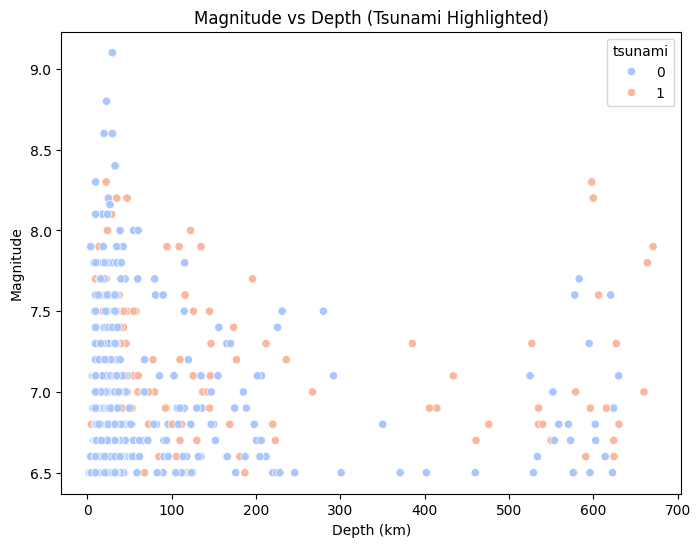

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='depth', y='magnitude', hue='tsunami', palette='coolwarm')
plt.title('Magnitude vs Depth (Tsunami Highlighted)')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


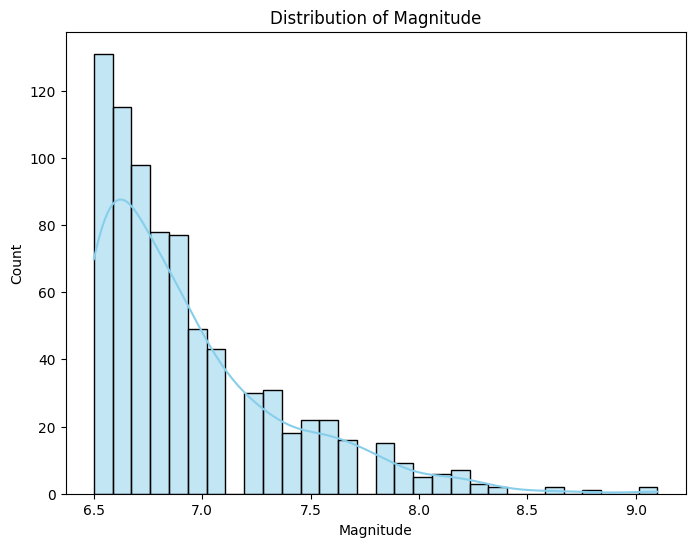

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['magnitude'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.show()


In [15]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     color='tsunami',
                     hover_name='Year',
                     size='magnitude',
                     projection='natural earth',
                     title='Global Earthquakes with Tsunami Occurrences')
fig.show()


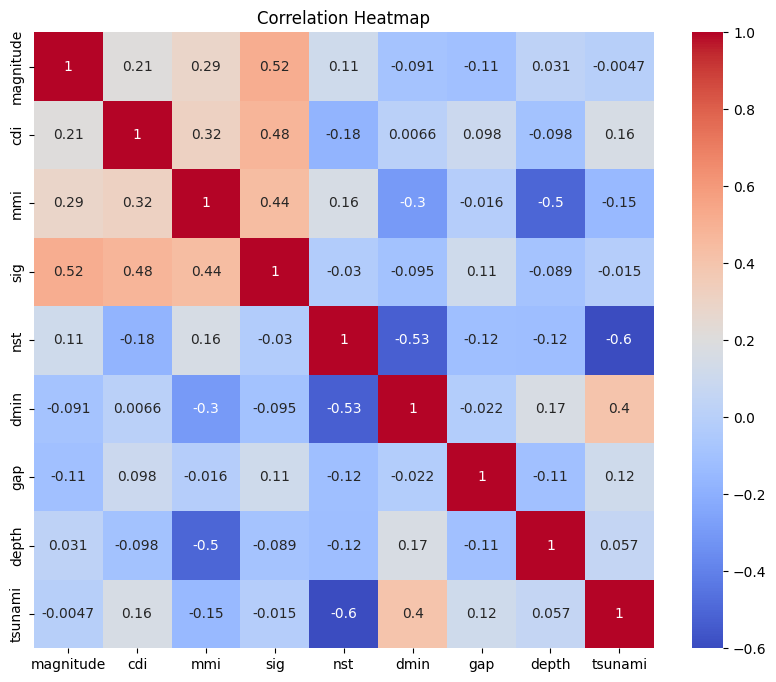

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['magnitude','cdi','mmi','sig','nst','dmin','gap','depth','tsunami']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/tmp/ipython-input-255196360.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




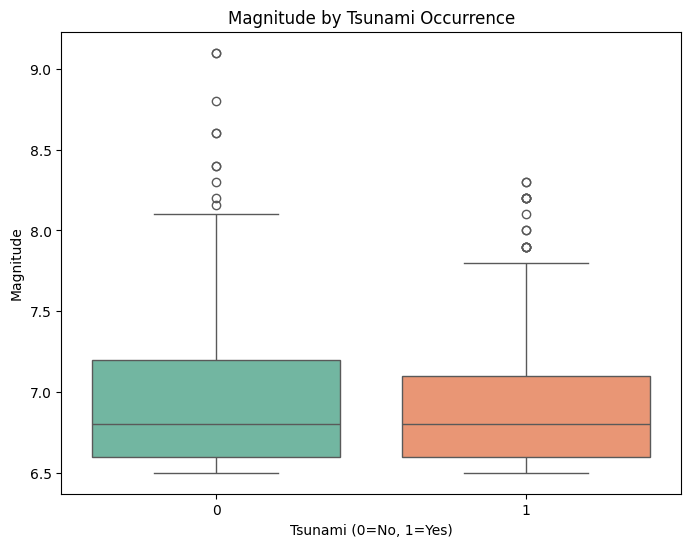

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='tsunami', y='magnitude', palette='Set2')
plt.title('Magnitude by Tsunami Occurrence')
plt.xlabel('Tsunami (0=No, 1=Yes)')
plt.ylabel('Magnitude')
plt.show()


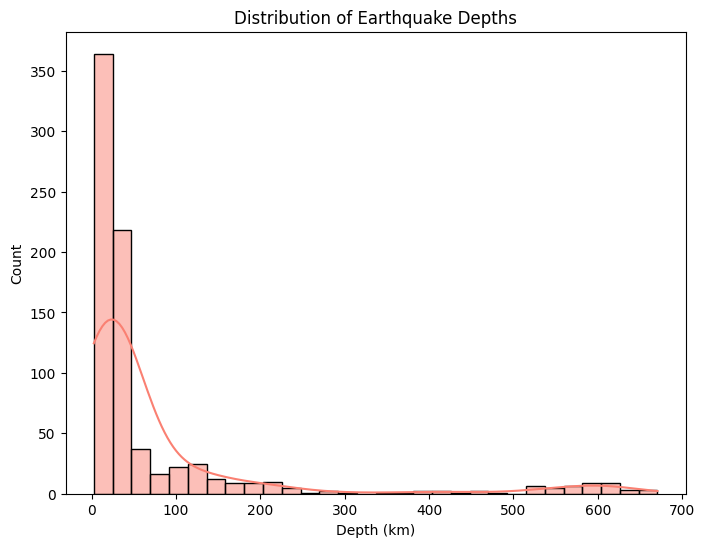

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(df['depth'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Count')
plt.show()


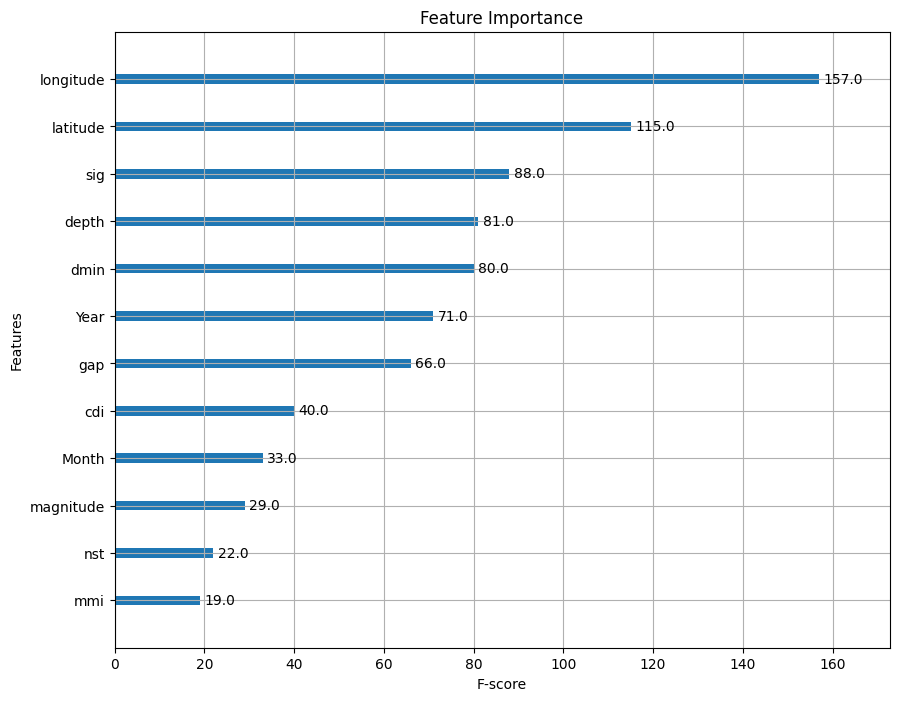

In [26]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, ax=plt.gca())
plt.title('Feature Importance')
plt.xlabel('F-score')
plt.ylabel('Features')
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features and target
X = df[['magnitude','cdi','mmi','sig','nst','dmin','gap','depth','latitude','longitude','Year','Month']]
y = df['tsunami']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for SVM and FNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(report_xgb)


XGBoost Accuracy: 0.9235668789808917
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        96
           1       0.89      0.92      0.90        61

    accuracy                           0.92       157
   macro avg       0.92      0.92      0.92       157
weighted avg       0.92      0.92      0.92       157



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[12:32:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




In [27]:
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(report_svm)


SVM Accuracy: 0.8980891719745223
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        96
           1       0.84      0.92      0.88        61

    accuracy                           0.90       157
   macro avg       0.89      0.90      0.89       157
weighted avg       0.90      0.90      0.90       157



In [29]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Build FNN
fnn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = fnn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    class_weight=dict(enumerate(weights)),
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_fnn = (fnn_model.predict(X_test_scaled) > 0.5).astype(int)

# Metrics
from sklearn.metrics import accuracy_score, classification_report
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
report_fnn = classification_report(y_test, y_pred_fnn)
print("FNN Accuracy:", accuracy_fnn)
print(report_fnn)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5143 - loss: 0.6675 - val_accuracy: 0.8160 - val_loss: 0.5559
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8442 - loss: 0.5350 - val_accuracy: 0.8320 - val_loss: 0.4507
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8228 - loss: 0.4473 - val_accuracy: 0.8400 - val_loss: 0.3847
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8356 - loss: 0.4052 - val_accuracy: 0.8400 - val_loss: 0.3672
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8365 - loss: 0.3546 - val_accuracy: 0.8400 - val_loss: 0.3633
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8468 - loss: 0.3558 - val_accuracy: 0.8480 - val_loss: 0.3516
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8715 - loss: 0.3116 - val_accuracy: 0.8480 - val_loss: 0.3564
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8590 - loss: 0.3059 - val_accuracy: 0.8480 - 

In [30]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -----------------------------
# 1. XGBoost metrics
# -----------------------------
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()

# -----------------------------
# 2. SVM metrics
# -----------------------------
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()

# -----------------------------
# 3. FNN metrics
# -----------------------------
# Convert FNN probabilities to 0/1
y_pred_fnn = (fnn_model.predict(X_test_scaled) > 0.5).astype(int)
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
report_fnn = classification_report(y_test, y_pred_fnn, output_dict=True)
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
tn_fnn, fp_fnn, fn_fnn, tp_fnn = cm_fnn.ravel()

# -----------------------------
# 4. Consolidate metrics
# -----------------------------
metrics_data = {
    'Model': ['XGBoost', 'SVM', 'FNN'],
    'Accuracy': [accuracy_xgb, accuracy_svm, accuracy_fnn],
    'Precision_0': [report_xgb['0']['precision'], report_svm['0']['precision'], report_fnn['0']['precision']],
    'Recall_0': [report_xgb['0']['recall'], report_svm['0']['recall'], report_fnn['0']['recall']],
    'F1_Score_0': [report_xgb['0']['f1-score'], report_svm['0']['f1-score'], report_fnn['0']['f1-score']],
    'Precision_1': [report_xgb['1']['precision'], report_svm['1']['precision'], report_fnn['1']['precision']],
    'Recall_1': [report_xgb['1']['recall'], report_svm['1']['recall'], report_fnn['1']['recall']],
    'F1_Score_1': [report_xgb['1']['f1-score'], report_svm['1']['f1-score'], report_fnn['1']['f1-score']],
    'TN': [tn_xgb, tn_svm, tn_fnn],
    'FP': [fp_xgb, fp_svm, fp_fnn],
    'FN': [fn_xgb, fn_svm, fn_fnn],
    'TP': [tp_xgb, tp_svm, tp_fnn]
}

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
     Model  Accuracy  Precision_0  Recall_0  F1_Score_0  Precision_1  \
0  XGBoost  0.923567     0.946809  0.927083    0.936842     0.888889   
1      SVM  0.898089     0.944444  0.885417    0.913978     0.835821   
2      FNN  0.891720     0.943820  0.875000    0.908108     0.823529   

   Recall_1  F1_Score_1  TN  FP  FN  TP  
0  0.918033    0.903226  89   7   5  56  
1  0.918033    0.875000  85  11   5  56  
2  0.918033    0.868217  84  12   5  56  
